# Importing Packages

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,  recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Loading the Data

In [3]:
Data = pd.read_csv('dataset_III.csv')
Data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Pre-Processing

In [4]:
x = Data.copy()
x.pop('output')
x = np.array(x)
y = np.array(Data['output'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

# Classification

In [36]:
base = SVC(probability=True , kernel='linear')
Model = AdaBoostClassifier(base_estimator=base, n_estimators=1000, learning_rate=0.001)

In [37]:
Model.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),
                   learning_rate=0.001, n_estimators=1000)

In [38]:
y_hat = Model.predict(x_test)
y_hat2 = Model.predict(x_train)

# Evaluation

For Test Set
F1 score:  0.8399999999999999
Accuracy:  0.8241758241758241
Precision:  0.84
Recall:  0.84
Confusion Matrix: 



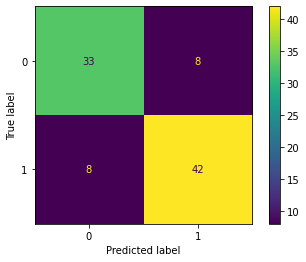


For Train Set
F1 score:  0.8595744680851064
Accuracy:  0.8443396226415094
Precision:  0.8416666666666667
Recall:  0.8782608695652174
Confusion Matrix: 



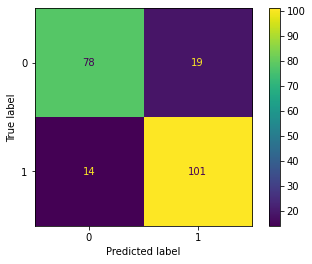

In [39]:
print('For Test Set')
f1 = f1_score(y_test, y_hat)
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat)
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat)
print('Recall: ' , recall)

matrix =  ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()

print('\nFor Train Set')
f1 = f1_score(y_train, y_hat2)
print('F1 score: ' , f1)

accuracy = accuracy_score(y_train, y_hat2)
print('Accuracy: ' , accuracy)

precision = precision_score(y_train, y_hat2)
print('Precision: ' , precision)

recall = recall_score(y_train, y_hat2)
print('Recall: ' , recall)

matrix =  ConfusionMatrixDisplay(confusion_matrix(y_train, y_hat2))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()